In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13714, done.
remote: Total 13714 (delta 0), reused 0 (delta 0), pack-reused 13714
Receiving objects: 100% (13714/13714), 12.31 MiB | 456.00 KiB/s, done.
Resolving deltas: 100% (9357/9357), done.


In [11]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/Users/satyamsingh/Desktop/PS_projects/darknet
sed: 1: "Makefile": invalid command code M
sed: 1: "Makefile": invalid command code M
sed: 1: "Makefile": invalid command code M


In [12]:
# make darknet (build)
!make

chmod +x *.sh


In [1]:
cd darknet

/Users/satyamsingh/Desktop/PS_projects/darknet


In [2]:
# functions to show after prediction
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(23, 15)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

running on four images and saving corresponding results in a result.txt

In [7]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg ../yolov3_custom_last.weights -dont_show < data/train.txt > result.txt

 OpenCV isn't used - data augmentation will be slow 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shor

 103 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  52 x 128 0.177 BF
 104 conv    256       3 x 3/ 1     52 x  52 x 128 ->   52 x  52 x 256 1.595 BF
 105 conv     30       1 x 1/ 1     52 x  52 x 256 ->   52 x  52 x  30 0.042 BF
 106 yolo
[yolo] params: iou loss: mse (2), iou_norm: 0.75, cls_norm: 1.00, scale_x_y: 1.00
Total BFLOPS 65.333 
avg_outputs = 517519 
Loading weights from ../yolov3_custom_last.weights...Done! Loaded 107 layers from weights-file 


In [8]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg ../yolov3_custom_last.weights images/photo1.jpeg -thresh 0.2

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128  

 102 conv    256       3 x 3/ 1     52 x  52 x 128 ->   52 x  52 x 256 1.595 BF
 103 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  52 x 128 0.177 BF
 104 conv    256       3 x 3/ 1     52 x  52 x 128 ->   52 x  52 x 256 1.595 BF
 105 conv     30       1 x 1/ 1     52 x  52 x 256 ->   52 x  52 x  30 0.042 BF
 106 yolo
[yolo] params: iou loss: mse (2), iou_norm: 0.75, cls_norm: 1.00, scale_x_y: 1.00
Total BFLOPS 65.333 
avg_outputs = 517519 
Loading weights from ../yolov3_custom_last.weights...
 seen 64, trained: 57 K-images (0 Kilo-batches_64) 
Done! Loaded 107 layers from weights-file 
images/photo1.jpeg: Predicted in 16221.762000 milli-seconds.
Main_area: 97%
Curves: 70%
Cap: 78%
Logo: 53%
Cap_extension: 26%
Curves: 93%
Not compiled with OpenCV, saving to predictions.png instead


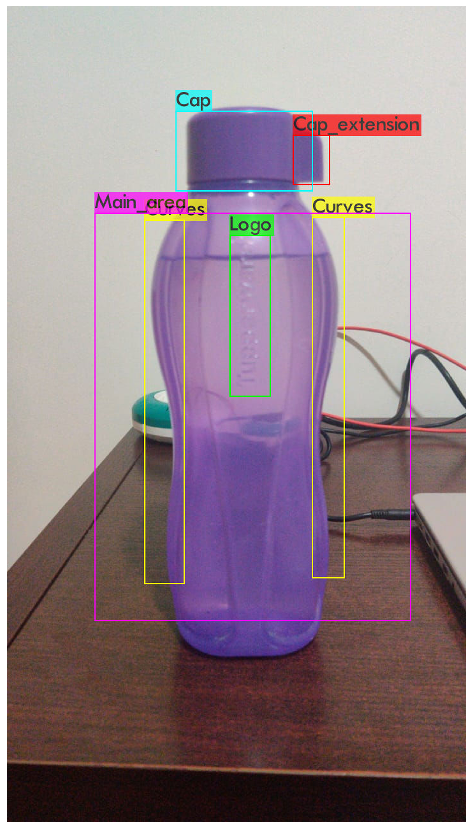

In [6]:
imShow('predictions.jpg')

In [13]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg ../yolov3_custom_last.weights images/photo2.jpeg -thresh 0.2

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128  

Done! Loaded 107 layers from weights-file 
images/photo2.jpeg: Predicted in 12550.305000 milli-seconds.
Main_area: 71%
Curves: 86%
Cap: 94%
Curves: 93%
Not compiled with OpenCV, saving to predictions.png instead


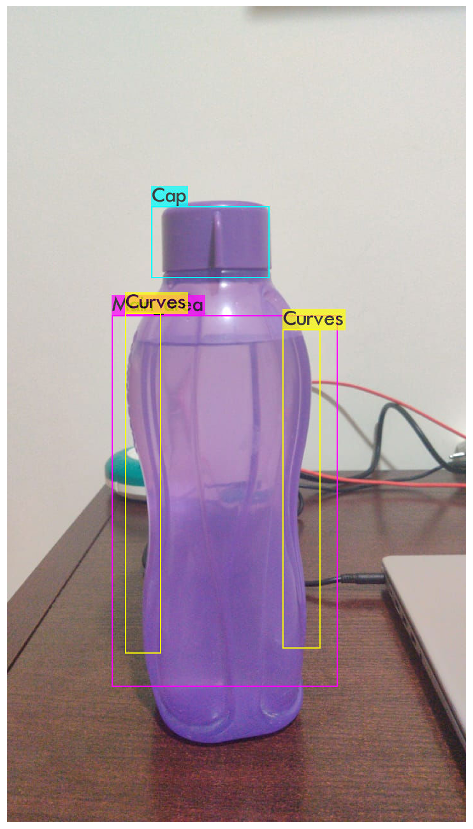

In [14]:
imShow('predictions.jpg')

In [15]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg ../yolov3_custom_last.weights images/photo3.jpeg -thresh 0.2

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128  

Loading weights from ../yolov3_custom_last.weights...
 seen 64, trained: 57 K-images (0 Kilo-batches_64) 
Done! Loaded 107 layers from weights-file 
images/photo3.jpeg: Predicted in 10678.767000 milli-seconds.
Main_area: 99%
Curves: 72%
Cap: 95%
Cap_extension: 23%
Logo: 43%
Curves: 78%
Not compiled with OpenCV, saving to predictions.png instead


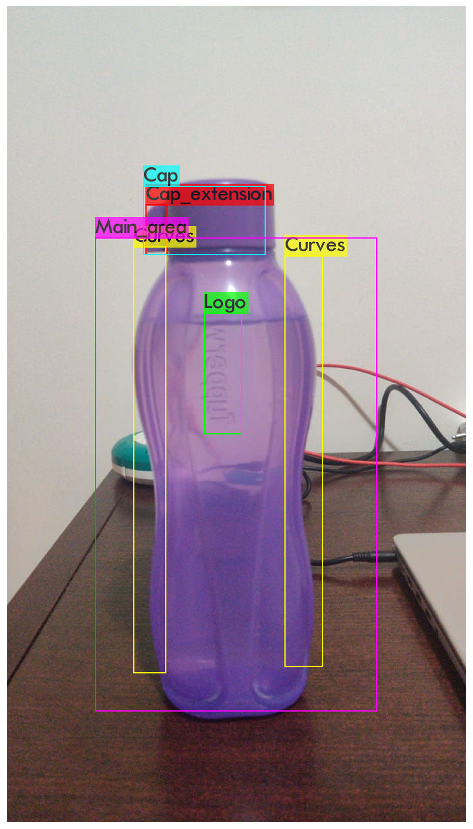

In [16]:
imShow('predictions.jpg')

In [17]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg ../yolov3_custom_last.weights images/photo4.jpeg -thresh 0.2

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128  

Loading weights from ../yolov3_custom_last.weights...
 seen 64, trained: 57 K-images (0 Kilo-batches_64) 
Done! Loaded 107 layers from weights-file 
images/photo4.jpeg: Predicted in 11092.946000 milli-seconds.
Main_area: 99%
Curves: 99%
Cap: 97%
Curves: 91%
Not compiled with OpenCV, saving to predictions.png instead


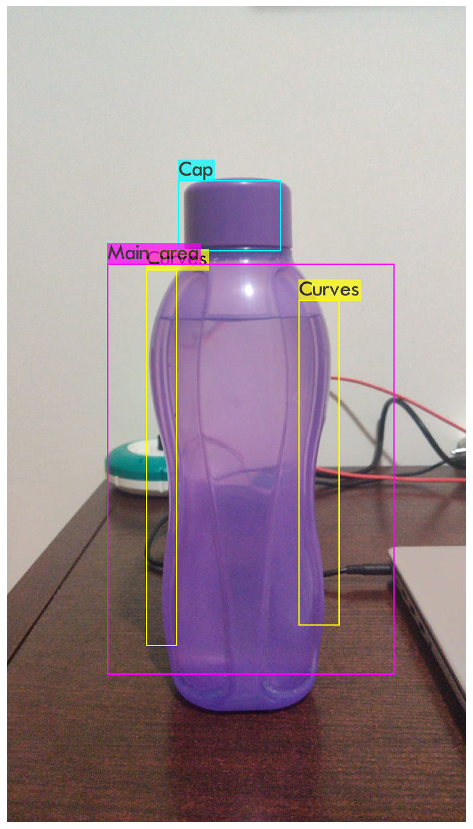

In [18]:
imShow('predictions.jpg')

In [28]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg ../yolov3_custom_last.weights images_green/photo1.jpeg -thresh 0.2

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128  

Loading weights from ../yolov3_custom_last.weights...
 seen 64, trained: 57 K-images (0 Kilo-batches_64) 
Done! Loaded 107 layers from weights-file 
images_green/photo1.jpeg: Predicted in 10494.433000 milli-seconds.
Curves: 82%
Main_area: 37%
Cap: 57%
Curves: 61%
Not compiled with OpenCV, saving to predictions.png instead


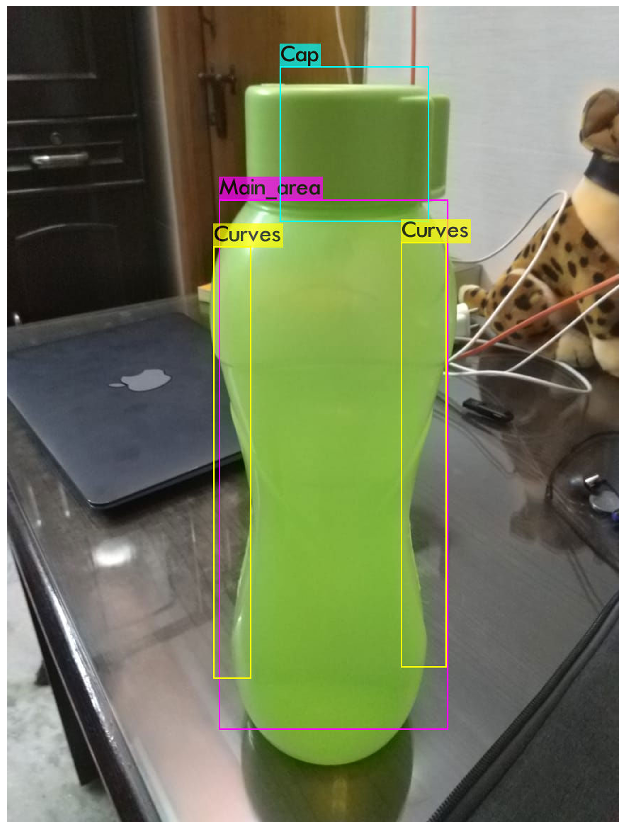

In [29]:
imShow('predictions.jpg')

In [30]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg ../yolov3_custom_last.weights images_green/photo2.jpeg -thresh 0.2

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128  

 102 conv    256       3 x 3/ 1     52 x  52 x 128 ->   52 x  52 x 256 1.595 BF
 103 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  52 x 128 0.177 BF
 104 conv    256       3 x 3/ 1     52 x  52 x 128 ->   52 x  52 x 256 1.595 BF
 105 conv     30       1 x 1/ 1     52 x  52 x 256 ->   52 x  52 x  30 0.042 BF
 106 yolo
[yolo] params: iou loss: mse (2), iou_norm: 0.75, cls_norm: 1.00, scale_x_y: 1.00
Total BFLOPS 65.333 
avg_outputs = 517519 
Loading weights from ../yolov3_custom_last.weights...
 seen 64, trained: 57 K-images (0 Kilo-batches_64) 
Done! Loaded 107 layers from weights-file 
images_green/photo2.jpeg: Predicted in 11223.831000 milli-seconds.
Main_area: 45%
Curves: 53%
Main_area: 33%
Curves: 58%
Not compiled with OpenCV, saving to predictions.png instead


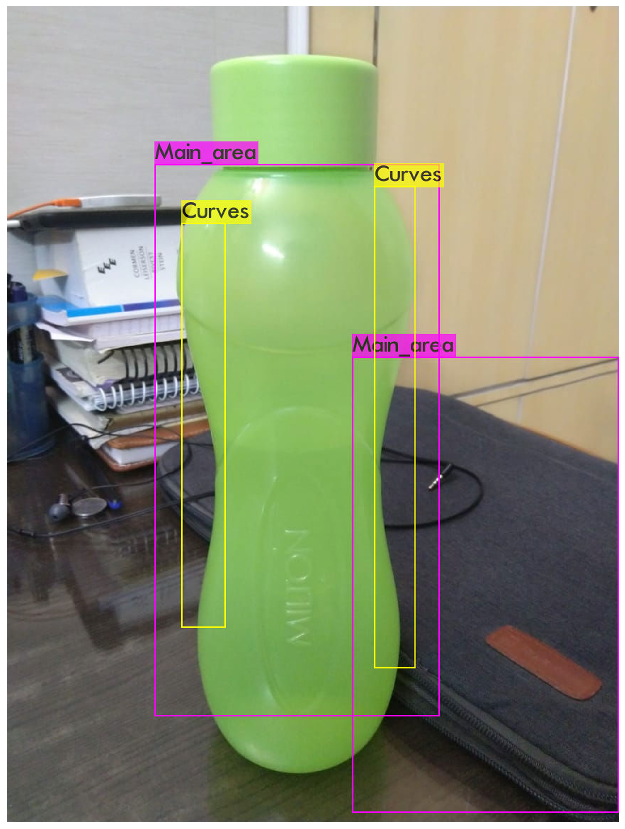

In [31]:
imShow('predictions.jpg')

In [36]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg ../yolov3_custom_last.weights images_green/photo3.jpeg -thresh 0.2

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128  

 102 conv    256       3 x 3/ 1     52 x  52 x 128 ->   52 x  52 x 256 1.595 BF
 103 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  52 x 128 0.177 BF
 104 conv    256       3 x 3/ 1     52 x  52 x 128 ->   52 x  52 x 256 1.595 BF
 105 conv     30       1 x 1/ 1     52 x  52 x 256 ->   52 x  52 x  30 0.042 BF
 106 yolo
[yolo] params: iou loss: mse (2), iou_norm: 0.75, cls_norm: 1.00, scale_x_y: 1.00
Total BFLOPS 65.333 
avg_outputs = 517519 
Loading weights from ../yolov3_custom_last.weights...
 seen 64, trained: 57 K-images (0 Kilo-batches_64) 
Done! Loaded 107 layers from weights-file 
images_green/photo3.jpeg: Predicted in 12133.068000 milli-seconds.
Main_area: 27%
Curves: 30%
Cap: 37%
Curves: 29%
Main_area: 54%
Not compiled with OpenCV, saving to predictions.png instead


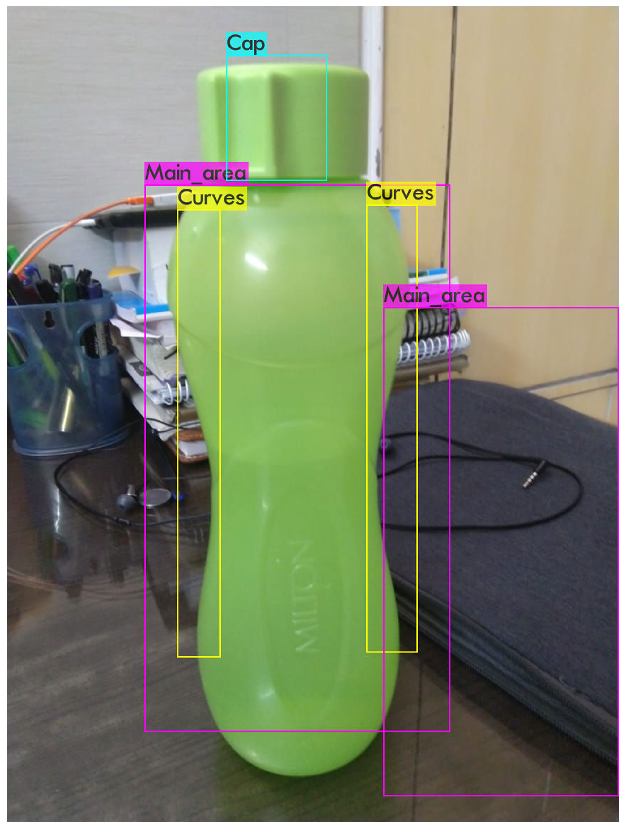

In [37]:
imShow('predictions.jpg')

In [38]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg ../yolov3_custom_last.weights images_green/photo4.jpeg -thresh 0.2

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128  

Loading weights from ../yolov3_custom_last.weights...
 seen 64, trained: 57 K-images (0 Kilo-batches_64) 
Done! Loaded 107 layers from weights-file 
images_green/photo4.jpeg: Predicted in 10986.924000 milli-seconds.
Curves: 73%
Main_area: 97%
Curves: 69%
Not compiled with OpenCV, saving to predictions.png instead


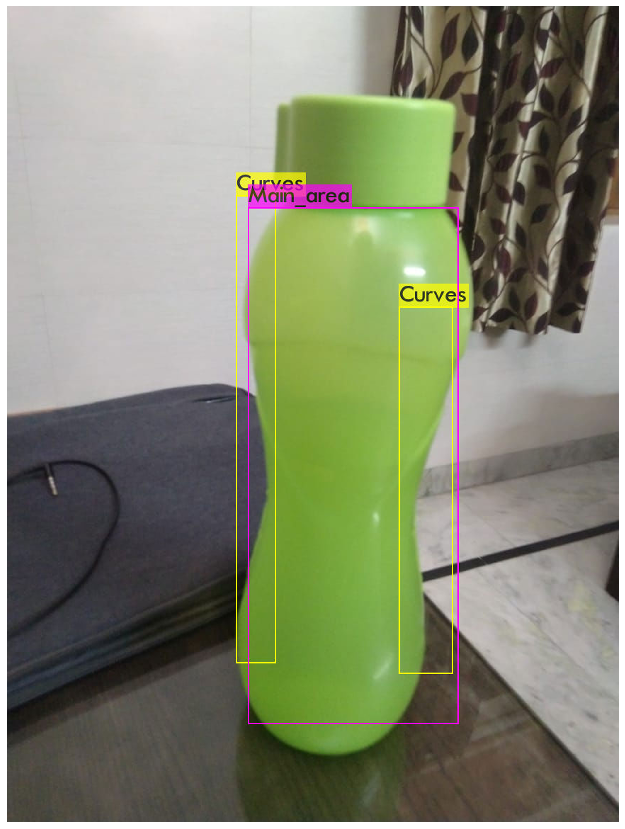

In [39]:
imShow('predictions.jpg')

In [27]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg ../yolov3_custom_last.weights -dont_show < data/train2.txt > result2.txt

 OpenCV isn't used - data augmentation will be slow 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shor

Loading weights from ../yolov3_custom_last.weights...Done! Loaded 107 layers from weights-file 
